---
<a name="comparison"></a>
# Comparison Range

#### The data we'll use is the CFD of 2 assets: **EURGBP** and **US30**, both extracted directly from *cTrader (Price Provider: ICmarkets/ICtrading*) using utilities *(cBots and Indicators)* found on the site before February 1st 2025, **where they dumped the community's codebase to an unknown fate.**

The file nomenclatures follow the following logic:
- `Range150`: 150 Range pips.
- `T1`: 1 Tick.

**For the Volume data**, 1 indicators were used *([Volume for Renko/Range](https://github.com/srlcarlg/srl-ctrader-indicators/blob/main/Raw%20Source%20Code/))* that I developed for cTrader some time ago, since we don't have these implementations natively at the moment.

## Non-Affiliation Disclaimer
I'm not endorsed by, directly affiliated with, maintained, authorized, or sponsored by any company previously mentioned. 
All product and company names are the registered trademarks of their original owners. 
The use of any trade name or trademark is for identification and reference purposes only and does not imply any association with the trademark holder of their product brand.

---

In [ ]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

from rangedf import Range

#### Let's load the Range/1-Tick cTrader's data

In [ ]:
df_origin = pd.read_parquet('data/US30_Range150_cT.parquet')
df_ticks = pd.read_parquet('data/US30_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

#### Now we'll create our Range chart with rangedf.py

In [ ]:
r = Range(df_ticks, range_size=15)
df_range = r.range_df()

---
#### Plotting to see if there is a significant visible difference

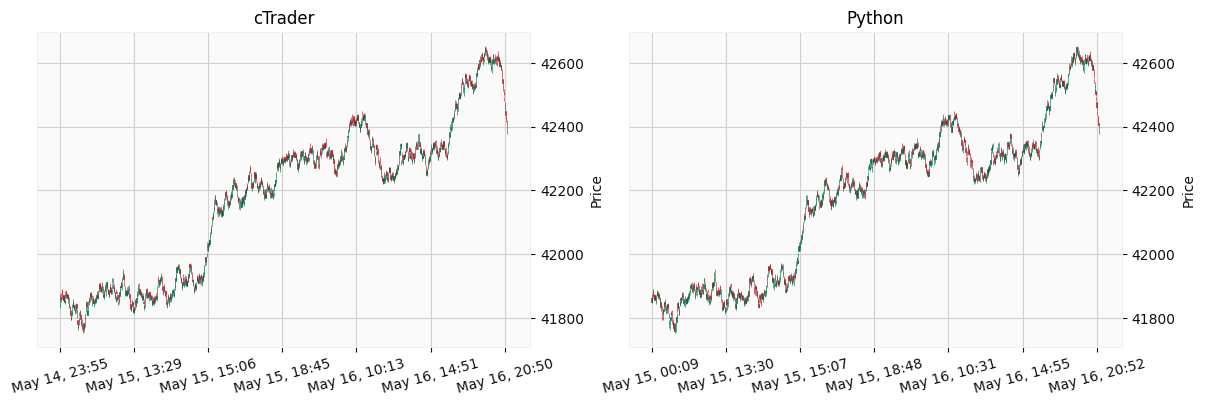

In [ ]:
fig = mpf.figure(figsize=(14,9))
ax1 = fig.add_subplot(2,2,1,style='yahoo')
ax2 = fig.add_subplot(2,2,2,style='yahoo')
mpf.plot(df_origin, type='candle', style='charles', ax=ax1, axtitle='cTrader',xrotation=15, warn_too_much_data=len(df_origin['close']))
mpf.plot(df_range, type='candle', style='charles', ax=ax2, axtitle='Python',xrotation=15, warn_too_much_data=len(df_range['close']))
mpf.show()

#### Let's try another approach

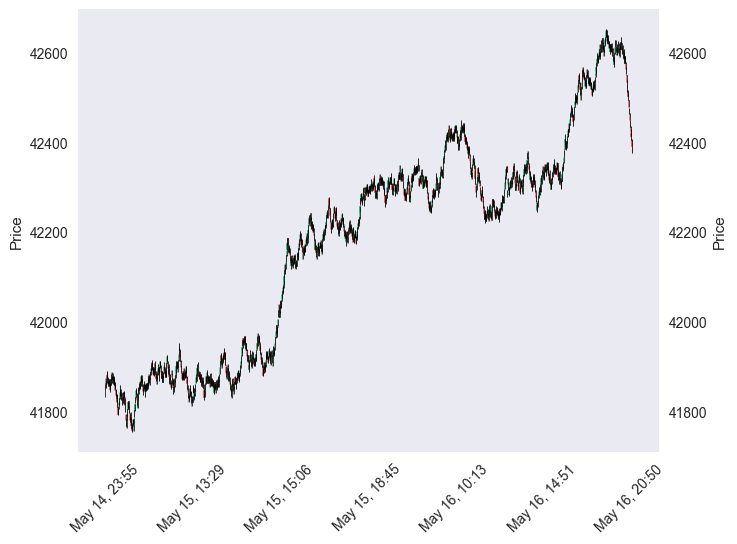

In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_range, ax=ax1, type='candle', style='yahoo', warn_too_much_data=len(df_range)+1)
mpf.plot(df_origin, ax=ax2, type='ohlc', style='default', warn_too_much_data=len(df_origin)+1)

mpf.show()

#### It can't be true! Both dataframes are equal?! We need numbers!

---
### First, how many range bars do we have of difference?

In [ ]:
print(f"rangedf: {len(df_range)}")
print(f"origin: {len(df_origin)}")
abs(len(df_range) - len(df_origin))

rangedf: 1207
origin: 1208


1

In [ ]:
df_origin.head(1).index
df_range.head(1).index
df_ticks.head(1).index

DatetimeIndex(['2025-05-14 23:55:45.246000'], dtype='datetime64[ns]', name='datetime', freq=None)

DatetimeIndex(['2025-05-15 00:09:38.641000'], dtype='datetime64[ns]', name='datetime', freq=None)

DatetimeIndex(['2025-05-15 00:00:00.650000'], dtype='datetime64[ns]', name='datetime', freq=None)

### Let's drop the first bar of df_origin to match the date from df_range
Since our 1-Tick data starts from 2025-05-15 00:00:00 and this bar has been forming since 2025-05-14 23:55:45

In [ ]:
df_origin.drop(df_origin.head(1).index, inplace=True)
df_origin.head(1).index
df_range.head(1).index

DatetimeIndex(['2025-05-15 00:01:19.675000'], dtype='datetime64[ns]', name='datetime', freq=None)

DatetimeIndex(['2025-05-15 00:09:38.641000'], dtype='datetime64[ns]', name='datetime', freq=None)

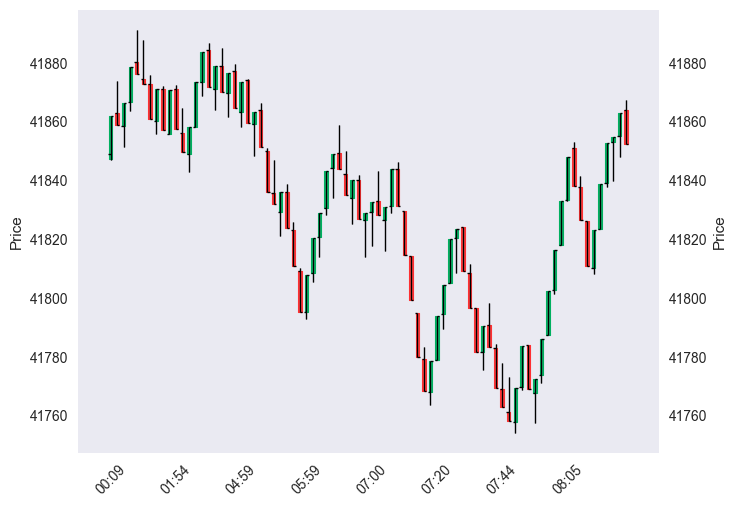

In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_origin.iloc[:80], ax=ax1, type='candle', style='yahoo')
mpf.plot(df_range.iloc[:80], ax=ax2, type='ohlc', style='default')

mpf.show()

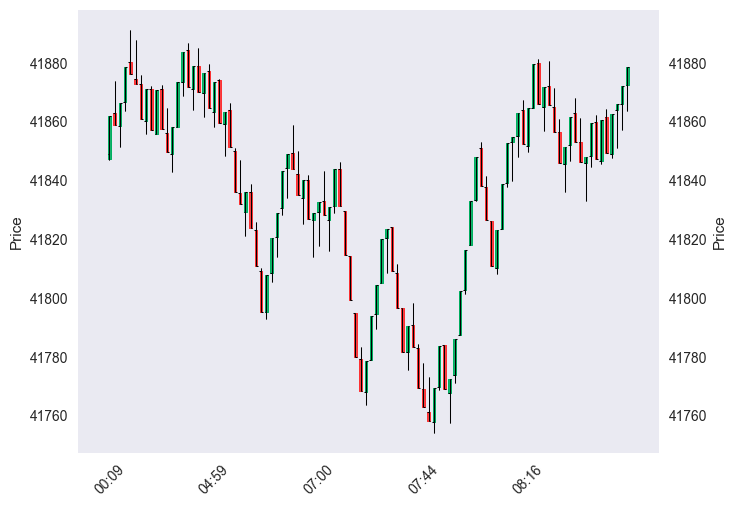

In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_origin.iloc[:100], ax=ax1, type='candle', style='yahoo')
mpf.plot(df_range.iloc[:100], ax=ax2, type='ohlc', style='default')

mpf.show()

#### Wonderful! Let's go to the last example.

In [ ]:
df_origin = pd.read_parquet('data/EURGBP_Range3_cT.parquet')
df_ticks = pd.read_parquet('data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

r = Range(df_ticks, range_size=0.0003)
df_range = r.range_df()

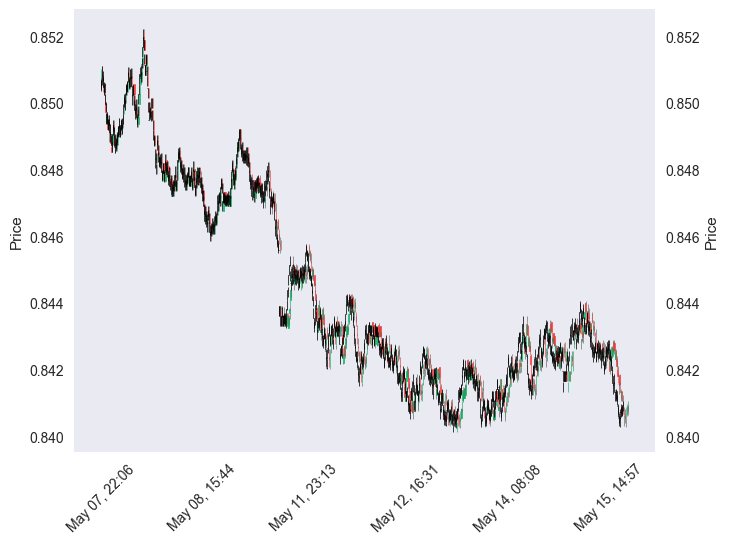

In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_range, ax=ax1, type='candle', style='yahoo', warn_too_much_data=len(df_range)+1)
mpf.plot(df_origin, ax=ax2, type='ohlc', style='default', warn_too_much_data=len(df_origin)+1)

mpf.show()

In [ ]:
print(f"rangedf: {len(df_range)}")
print(f"origin: {len(df_origin)}")
abs(len(df_range) - len(df_origin))

rangedf: 1038
origin: 1027


11

In [ ]:
df_origin.head(1).index
df_range.head(1).index
df_ticks.head(1).index

DatetimeIndex(['2025-05-07 22:06:13.239000'], dtype='datetime64[ns]', name='datetime', freq=None)

DatetimeIndex(['2025-05-08 00:20:02.244000'], dtype='datetime64[ns]', name='datetime', freq=None)

DatetimeIndex(['2025-05-08 00:00:00.678000'], dtype='datetime64[ns]', name='datetime', freq=None)

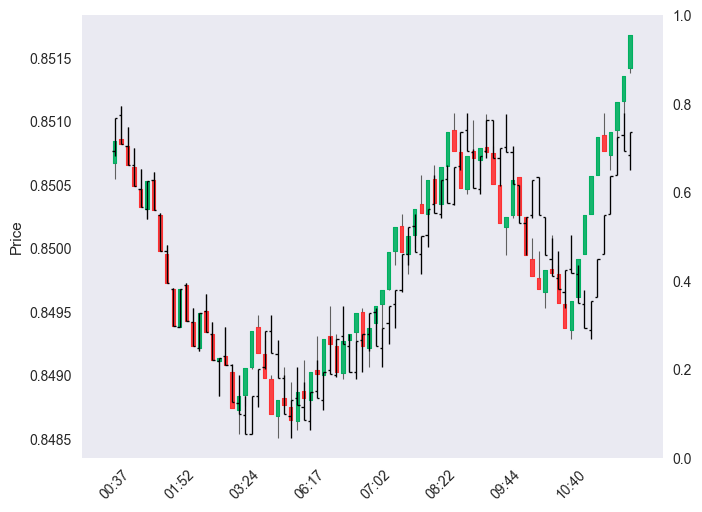

In [ ]:
# drop +1 bar to match
df_origin.drop(df_origin.head(2).index, inplace=True)
# drop the first bar to match
df_range.drop(df_range.head(1).index, inplace=True)

s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_origin.iloc[:80], ax=ax1, type='candle', style='yahoo')
mpf.plot(df_range.iloc[:80], ax=ax1, type='ohlc', style='default')

mpf.show()

#### Humm, looks like there are 2 more bars on the rangedf side, let's drop these two.

10

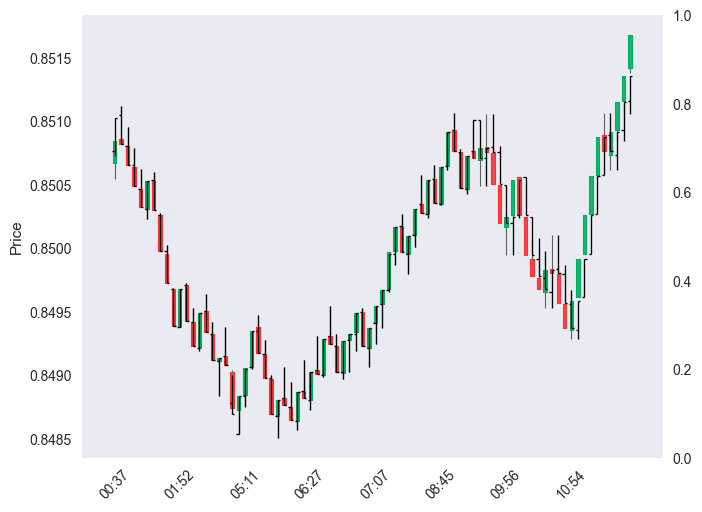

In [ ]:
df_range.drop(df_range.index[18], inplace=True)
df_range.drop(df_range.index[19], inplace=True)
len(df_range) - len(df_origin)

s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_origin.iloc[:80], ax=ax1, type='candle', style='yahoo')
mpf.plot(df_range.iloc[:80], ax=ax1, type='ohlc', style='default')

mpf.show()

#### Well, the way rangedf **handles price gaps** doesn't have any margin, so if the price gap goes outside of the given range, its create a new bar and the current tick (this gap) will be the next range-bar's open price.

## Despite the possible occurrence of more/less bars in cases of gap, the range calculation is practically the same or very approximate.

#### See below, where we are omitting 2 bars from df_range to match the bar count of df_origin
Look at the beginning, rangedf creates 1 pin bar before this bullish trend, after that takes 1 bar to match with df_origin's OHLC

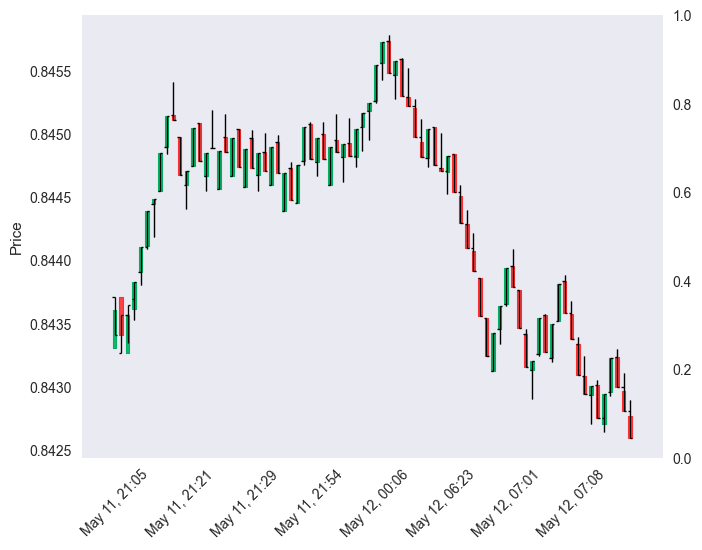

In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

diff_index = df_origin.index.get_loc('2025-05-11 21:05:35.240000')
diff2_index = df_range.index.get_loc('2025-05-11 21:05:35.240000')

mpf.plot(df_origin.iloc[diff_index : diff_index + 80],
         ax=ax1, type='candle', style='yahoo',
         warn_too_much_data=len(df_origin))

mpf.plot(df_range.iloc[diff2_index + 2 : diff2_index + 82],
         ax=ax1, type='ohlc', style='default',
         warn_too_much_data=len(df_range))

mpf.show()